### Student Information
Name: 李念紘

Student ID: 110078501

GitHub ID: NianHung

Kaggle name: 

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



In [2]:
### Begin Assignment Here

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
# avoid bias
train_df = train_df.sample(frac=1) # frac=1 means shuffle the dataset
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

<AxesSubplot: title={'center': 'train_df top 30 terms frequencies'}, xlabel='terms'>

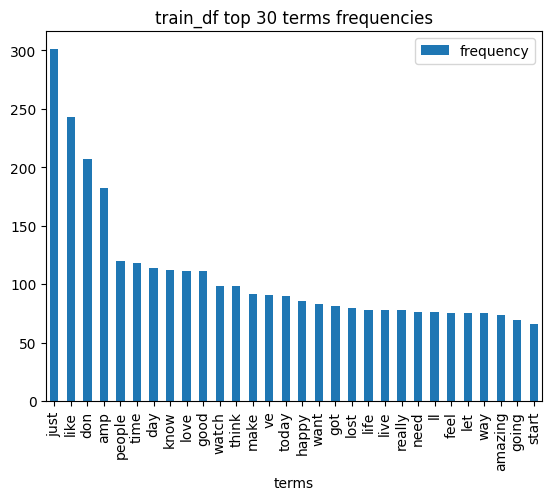

In [7]:
# Answer here

# train_df
# get unigrams
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))

# remove the stopwords at the same time
train_count_vect = CountVectorizer(stop_words = 'english')
train_counts = train_count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix

# count train_df's terms' frequencies
train_frequency = np.asarray(train_counts.sum(axis=0))[0]

# form a frequency dataframe
train_top_30_words = pd.DataFrame(zip(train_count_vect.get_feature_names_out(), train_frequency),
                                 columns=["terms", "frequency"]).sort_values(by='frequency', ascending=False)

# plot for Top 30 words of train_df
train_top_30_words[0:30].plot(x='terms', y='frequency', kind='bar', title='train_df top 30 terms frequencies')

<AxesSubplot: title={'center': 'test_df top 30 terms frequencies'}, xlabel='terms'>

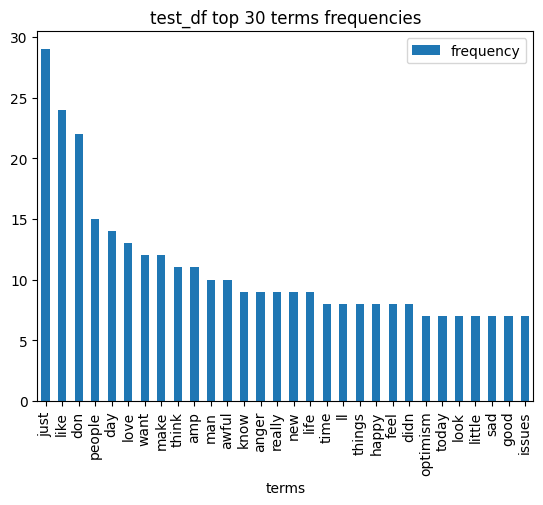

In [8]:
# Answer here

# text_df
# get unigrams
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))

# remove the stopwords at the same time
test_count_vect = CountVectorizer(stop_words = 'english')
test_counts = test_count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix

# count test_df's terms' frequencies
test_frequency = np.asarray(test_counts.sum(axis=0))[0]

# form a frequency dataframe
test_top_30_words = pd.DataFrame(zip(test_count_vect.get_feature_names_out(), test_frequency),
                                 columns=["terms", "frequency"]).sort_values(by='frequency', ascending=False)

# plot for Top 30 words of test_df
test_top_30_words[0:30].plot(x='terms', y='frequency', kind='bar', title='test_df top 30 terms frequencies')

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [9]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [10]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [11]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

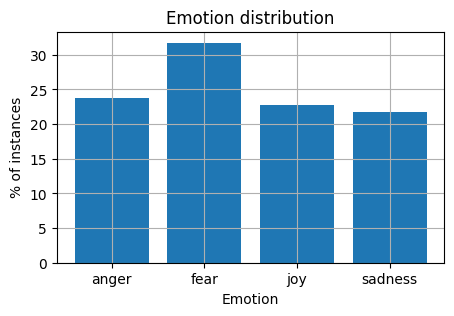

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [15]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [16]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [17]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [18]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# check the dimension
# have 10115 words
train_data_BOW_features.shape

(3613, 10115)

In [20]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [21]:
"😂" in feature_names # not included, no helping in predicting

False

Let's try using another tokenizer below.

In [22]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\Joanne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [23]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [25]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [26]:
# Answer here

# import TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (TF-IDF)
ex_2_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# generate TF-IDF features
TFIDF_1000 = ex_2_vectorizer.fit_transform(train_df['text'])

## check dimension
print(TFIDF_1000.shape)

# observe some feature names
feature_names_1000 = ex_2_vectorizer.get_feature_names_out()
feature_names_1000[100:110]

(3613, 1000)


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [28]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'joy', 'fear', 'fear', 'anger', 'joy', 'fear',
       'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [29]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [30]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [31]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [32]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', 
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    # cmap is color map
    # classes is label
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd' # help us setting the color, 'f' -> floating number
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

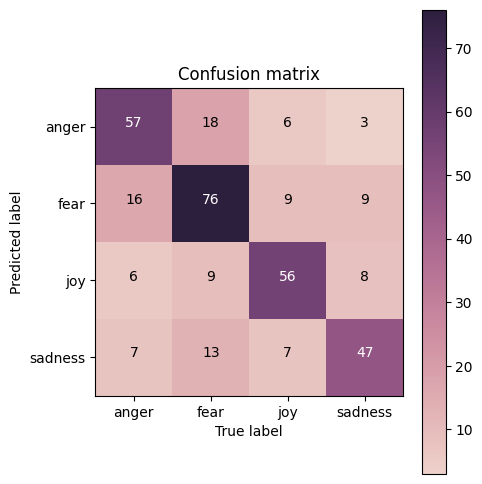

In [33]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here

**We can easily see the number of correct classifications and the respective number of other wrong classifications from the confusion matrix. For example, in the true label of "angry", there have 57 predicted correctly, 16 wrongly classified as "fear", 6 wrongly classified as "joy" and 7 wrongly classified as "sadness".**

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [34]:
# Answer here

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [35]:
# import naive bayes
from sklearn.naive_bayes import MultinomialNB
# build naive bayes model
NB = MultinomialNB()

# training!
NB.fit(X_train, y_train)

# predict!
NB_train_pred = NB.predict(X_train)
NB_test_pred = NB.predict(X_test)

## so we get the pred result
NB_test_pred[:10]

array(['fear', 'joy', 'fear', 'fear', 'fear', 'fear', 'anger', 'joy',
       'joy', 'sadness'], dtype='<U7')

In [36]:
# accuracy!
from sklearn.metrics import accuracy_score

NB_acc_train = accuracy_score(y_true=y_train, y_pred=NB_train_pred)
NB_acc_test = accuracy_score(y_true=y_test, y_pred=NB_test_pred)

print('training accuracy: {}'.format(round(NB_acc_train, 2)))
print('testing accuracy: {}'.format(round(NB_acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [37]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=NB_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [38]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

NB_cm = confusion_matrix(y_true=y_test, y_pred=NB_test_pred) 
print(NB_cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


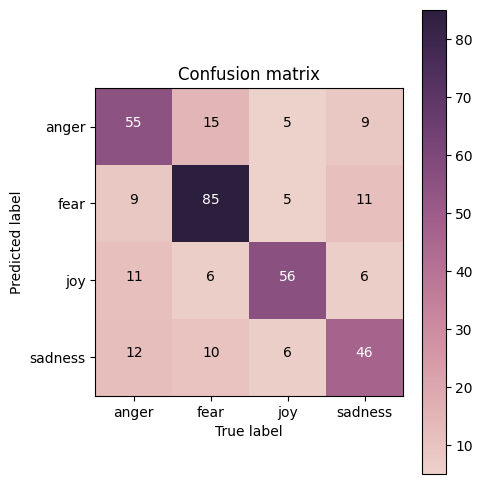

In [39]:
# plot NB confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(NB_cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here

**The decision tree's training accuracy is 0.99, but in testing is 0.68. Here might occur the overfitting because it fits too well in training data but poor in testing data. Also, the Decision Tree model is data-driven which means it needs a large data set. So, the poor performance might be because of the small data set.
And in the Naive Bayes model result, the accuracy in training and testing are very close. The Naive Bayes model is based on conditional probability, once the probability is finished calculating from the training data, the classification based on this probability will not make much difference.**

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [40]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [41]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3560    sadness
2873    sadness
2277        joy
1473       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


C:\Users\Joanne\AppData\Local\Temp\ipykernel_17968\508161062.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


### 6.3 Build model

In [42]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [43]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer # training data
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer # result, here is the emotions
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [44]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25 # 25 times
batch_size = 32 # 32 samples each time

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\Joanne\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 4ms/step - loss: 1.3281 - accuracy: 0.3642 - val_loss: 1.2678 - val_accuracy: 0.4899
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9956 - accuracy: 0.6396 - val_loss: 0.9369 - val_accuracy: 0.6455
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5868 - accuracy: 0.8010 - val_loss: 0.8414 - val_accuracy: 0.6859
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8489 - val_loss: 0.7926 - val_accuracy: 0.6859
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.8779 - val_loss: 0.8592 - val_accuracy: 0.6686
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.9106 - val_loss: 0.8880 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2197 - accuracy: 0.9286 - val_loss: 0.9336 - val_accuracy: 0.6916
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [45]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5] # one-hot encoding

3/3 [==============================] - 0s 3ms/step


array([[1.4735965e-04, 8.2319856e-01, 1.7637630e-01, 2.7779929e-04],
       [2.6488313e-02, 1.3284703e-03, 7.9722971e-01, 1.7495355e-01],
       [2.6497433e-01, 4.5877212e-01, 2.5131193e-01, 2.4941575e-02],
       [2.4605382e-05, 9.9626726e-01, 4.1494483e-09, 3.7082152e-03],
       [8.4304543e-07, 9.9989438e-01, 7.4517338e-08, 1.0465839e-04]],
      dtype=float32)

In [46]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'joy', 'fear', 'fear', 'fear'], dtype=object)

In [47]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [48]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.364240,1.328120,0.489914,1.267797
1,1,0.639635,0.995588,0.645533,0.936863
2,2,0.800996,0.586778,0.685879,0.841446
3,3,0.848879,0.415983,0.685879,0.792612
4,4,0.877941,0.326627,0.668588,0.859184
5,5,0.910601,0.266024,0.691643,0.887986
6,6,0.928591,0.219746,0.691643,0.933648
7,7,0.940769,0.181890,0.691643,0.994780
8,8,0.952117,0.160960,0.685879,1.031029
9,9,0.959314,0.136006,0.680115,1.120061


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

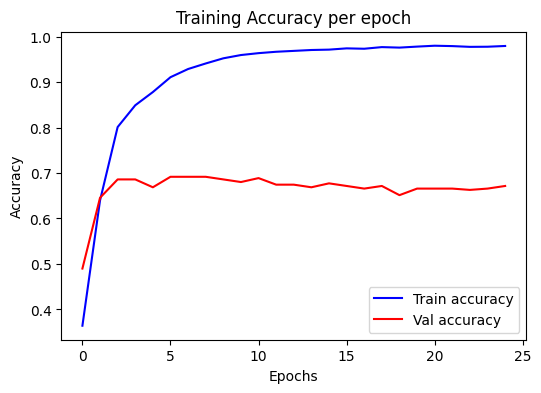

In [49]:
# Answer here

# plot training accuracy chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(training_log['epoch'], training_log['accuracy'], color="blue", label="Train accuracy")
plt.plot(training_log['epoch'], training_log['val_accuracy'], color="red", label="Val accuracy")
# labels
plt.title("Training Accuracy per epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

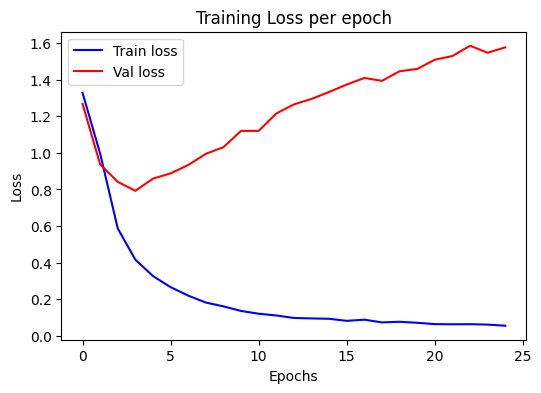

In [50]:
# plot training loss chart
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(training_log['epoch'], training_log['loss'], color="blue", label="Train loss")
plt.plot(training_log['epoch'], training_log['val_loss'], color="red", label="Val loss")
# labels
plt.title("Training Loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**From the plots above, the training accuracy gets near 0.9 after epoch 3, but the training loss increases a lot at the same time. Therefore, there has occurred overfitting.**

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [51]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3560,40733,"Be joyful in hope, patient in affliction, fait...","[Be, joyful, in, hope, ,, patient, in, afflict..."
2873,40046,"bad news fam, life is still hard and awful #de...","[bad, news, fam, ,, life, is, still, hard, and..."
2277,30273,Watching Avatar and wondering why I took so lo...,"[Watching, Avatar, and, wondering, why, I, too..."
1473,20616,One more step in long work #visa process is ov...,"[One, more, step, in, long, work, #, visa, pro..."
2559,30555,Watch this amazing live.ly broadcast by @brook...,"[Watch, this, amazing, live.ly, broadcast, by,..."


In [52]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Be', 'joyful', 'in', 'hope', ',', 'patient', 'in', 'affliction', ',', 'faithful', 'in', 'prayer', '.', 'Romans', '12:12']),
       list(['bad', 'news', 'fam', ',', 'life', 'is', 'still', 'hard', 'and', 'awful', '#', 'depression', '#', 'anxiety', '#', 'atleastIhaveBuffy']),
       list(['Watching', 'Avatar', 'and', 'wondering', 'why', 'I', 'took', 'so', 'long', 'to', 'watch', 'this', '*', 'collapses', 'in', 'a', 'joyous', 'heap', '*'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [53]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [54]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.2668656 ,  0.08414421, -0.1881835 ,  0.12945928,  0.09742942,
       -1.3140175 ,  0.16732243,  1.5883656 , -0.37771887, -0.09617881,
       -0.7888724 , -0.48683605, -0.2624819 ,  0.2891358 , -0.03288852,
       -0.38121235,  0.5592457 , -0.45317182,  0.1909793 , -1.3002869 ,
        0.84246755,  0.65502924,  0.72817683, -0.37642202,  0.34767267,
        0.04496146, -0.65981525,  0.16508909, -0.16840006, -0.03700322,
        0.24012882,  0.25646186,  0.6782007 , -0.7559758 ,  0.22905135,
        0.747269  ,  0.26801422, -0.23126386, -0.8591543 ,  0.07857944,
       -0.08289995, -0.06738874, -0.40672576, -0.01688839,  0.33959806,
       -0.5502082 , -0.32344776,  0.1592902 ,  0.61379534,  0.14355485,
        0.19135956, -0.763138  , -0.08140252,  0.39157897, -0.8855    ,
       -0.14358328, -0.00669649, -0.47715145, -0.191341  ,  0.22500257,
        0.43672368, -0.18718988,  0.46208215,  0.16821723, -0.6868485 ,
        0.97597533,  0.06924677,  0.58239204, -1.3149066 ,  0.66

In [55]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9103084206581116),
 ('.\\nA', 0.9076853394508362),
 ('right', 0.9073097705841064),
 ('questions', 0.9065835475921631),
 ('Be', 0.9060717225074768),
 ('establishment', 0.9006780982017517),
 ('See', 0.8991240859031677),
 ('pls', 0.8985364437103271),
 ('hope', 0.8982788920402527),
 ('cry', 0.8929562568664551)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [56]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [57]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [58]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


**I think we can calculate the word vectors then sum the word vectors up in each sentence and take the averge.
After this proccess, we form a new vector of each input sentence.**

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [59]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [60]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [61]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [62]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [63]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

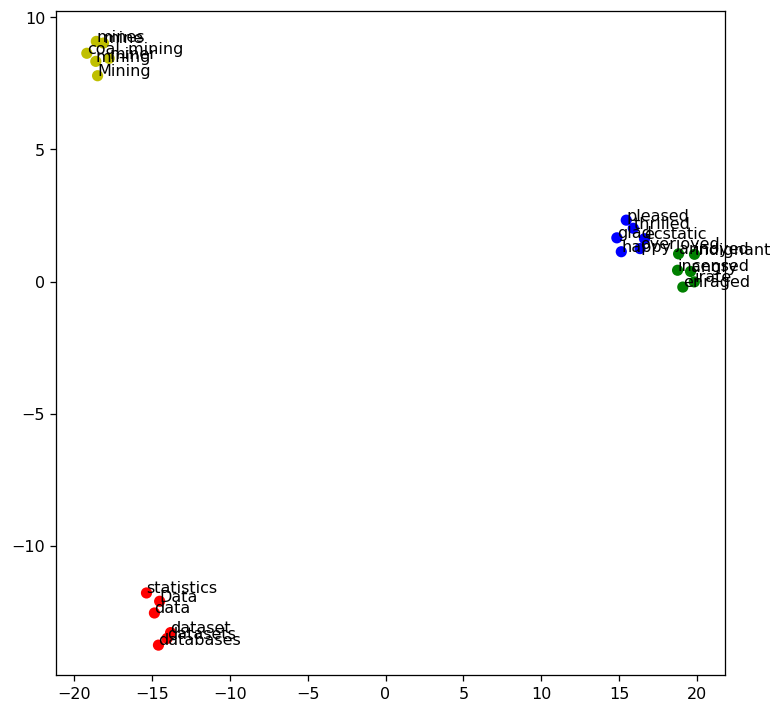

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [68]:
# Answer here
ex_8_word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_word = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_word = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_word = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_word = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_word)
print('happy_words: ', happy_word)
print('sad_words: ', sad_word)
print('fear_words: ', fear_word)

target_word = angry_word + happy_word + sad_word + fear_word
print('\ntarget words: ')
print(target_word)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

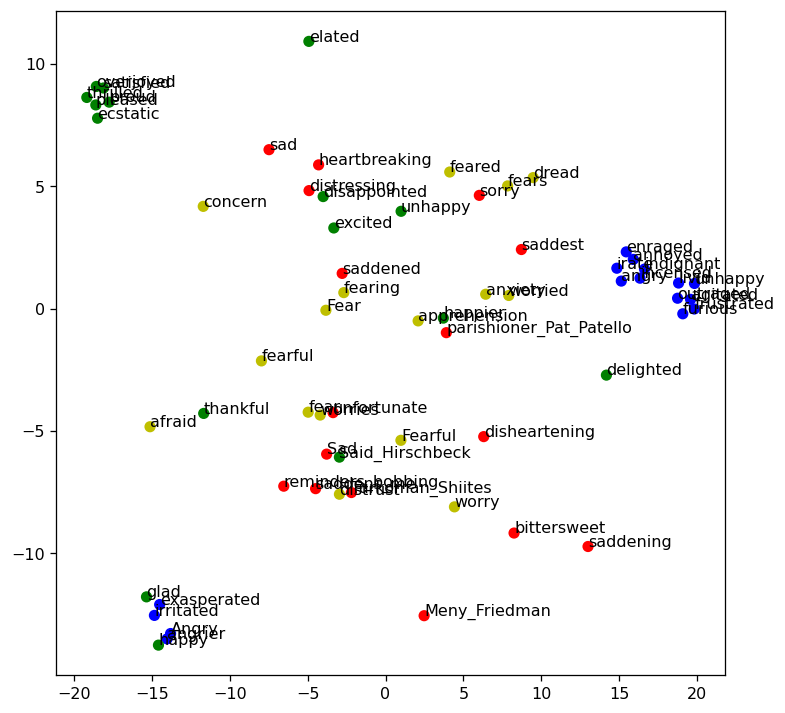

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_word)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_word, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

### Second & Third Parts

In [67]:
import pandas as pd
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

In [32]:
# read the json data
tweets_DM = pd.read_json("data/tweets_DM.json", lines=True)

In [10]:
# read the csv data
df_emotion = pd.read_csv("data/emotion.csv")
df_identification = pd.read_csv("data/data_identification.csv")

In [15]:
# get the imformation in _source
source = pd.json_normalize(tweets_DM['_source'])
source.columns = ['hashtags', 'tweet_id', 'text'] # change columns' name
source

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [11]:
df_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [18]:
# join source & df_emotion together by tweet_id
tweets_data = source.join(df_emotion.set_index('tweet_id'), on='tweet_id')

# join tweets_data & df_identification together by tweet_id
tweets_data = tweets_data.join(df_identification.set_index('tweet_id'), on='tweet_id')

# check 
tweets_data

,hashtags,tweet_id,text,emotion,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,NaN,test
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,NaN,test
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,NaN,test
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy,train


In [19]:
# split training set and testing set by identification
tweets_train_df = tweets_data[tweets_data.identification == 'train']
tweets_test_df = tweets_data[tweets_data.identification == 'test']

In [22]:
# check
tweets_train_df

,hashtags,tweet_id,text,emotion,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,train
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,train
...,...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy,train
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,joy,train
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,joy,train
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy,train


In [25]:
# remove identification
tweets_train_df = tweets_train_df.drop(columns=['identification'])

# check
tweets_train_df

,hashtags,tweet_id,text,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,joy
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,joy
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [21]:
tweets_test_df

,hashtags,tweet_id,text,emotion,identification
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,NaN,test
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",NaN,test
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",NaN,test
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",NaN,test
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",NaN,test
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,NaN,test
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,NaN,test


In [26]:
# remove identification and emotion
tweets_test_df = tweets_test_df.drop(columns=['identification', 'emotion'])

# check
tweets_test_df

,hashtags,tweet_id,text
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,[],0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th..."
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l..."
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...


In [27]:
# save csv file for next time
tweets_train_df.to_csv("data/tweets_train.csv", index=False)
tweets_test_df.to_csv("data/tweets_test.csv", index=False)

# Training dara & testing data

In [33]:
# second time can read the csv file
tweets_train_df = pd.read_csv("data/tweets_train.csv")
tweets_test_df = pd.read_csv("data/tweets_test.csv")

In [34]:
# shuffle dataset
# avoid bias
tweets_train_df = tweets_train_df.sample(frac=1, random_state=110078501) # frac=1 means shuffle the dataset
tweets_test_df = tweets_test_df.sample(frac=1, random_state=110078501)

In [33]:
# # create validation set from part of training data
# tweets_validation_df = tweets_train_df[0:450000] # 450000/1455563 = 0.3091 (30%)
# tweets_train_df = tweets_train_df[450000:]

In [37]:
# from sklearn.model_selection import train_test_split

In [38]:
# # split data into training set and testing set
# X_train, X_test, Y_train, Y_test = train_test_split(tweets_train_df, tweets_train_df.emotion, test_size=0.3, random_state=110078501)

In [7]:
# create stopwords list
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joanne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# clean train data
# lowercase the words and remove the stopwords
tweets_train_df['no_stopword_text'] = tweets_train_df['text'].apply(lambda x: ' '.join(word.lower() for word in x.split() if not word in nltk_stopwords))

# check
tweets_train_df

,hashtags,tweet_id,text,emotion,no_stopword_text
1105612,['neko'],0x2613ff,@horosluvr Nyaw~ my fav is #neko but ookami so...,trust,@horosluvr nyaw~ fav #neko ookami <lh> 😍😍 real...
723849,['mysadness'],0x27db71,Your light is now gone / The world filled wit...,sadness,your light gone / the world filled absence / y...
882644,[],0x345aed,<LH> people are actually angry with the one wh...,fear,<lh> people actually angry one gifted you. not...
256643,[],0x312bbc,@MsEleanor_01 @ian_mc_brown @WYPlayhouse a) Ne...,anticipation,@mseleanor_01 @ian_mc_brown @wyplayhouse a) ne...
477710,[],0x207071,@abc7newsbayarea Clowns will just about anythi...,sadness,@abc7newsbayarea clowns anything keep jobs. da...
...,...,...,...,...,...
1079166,"['hot', 'BB11', 'PoolParty', 'BandgiKalra', 'b...",0x26e70e,Quite #hot temperature in #BB11. #PoolParty. #...,joy,quite #hot temperature #bb11. #poolparty. #ban...
1006582,[],0x2fd1c1,"<LH> <LH> Proverbs19:26 Only a shameful, disgr...",anticipation,"<lh> <lh> proverbs19:26 only shameful, disgrac..."
47052,[],0x36bb3e,@SoCalTelevision <LH> &gt;&gt; Covina standoff...,anticipation,@socaltelevision <lh> &gt;&gt; covina standoff...
17469,['HTHOnline'],0x29269c,Every human being is an extension of God. You ...,joy,every human extension god. you truly love god ...


In [47]:
# clean train data
# remove name tag
tweets_train_df['no_stopword_text'] = tweets_train_df['no_stopword_text'].apply(lambda x: ' '.join(word for word in x.split() if word[0]!='@'))
tweets_train_df['clean_text'] = tweets_train_df['text'].apply(lambda x: ' '.join(word.lower() for word in x.split() if word[0]!='@'))
tweets_train_df['no_name_text'] = tweets_train_df['text'].apply(lambda x: ' '.join(word.lower() for word in x.split() if word[0]!='@'))

# check
tweets_train_df

,hashtags,tweet_id,text,emotion,no_stopword_text,clean_text,no_name_text
1105612,['neko'],0x2613ff,@horosluvr Nyaw~ my fav is #neko but ookami so...,trust,nyaw fav neko ookami lh really love one,nyaw~ my fav is #neko but ookami so <lh> too 😍...,nyaw~ my fav is #neko but ookami so <lh> too 😍...
723849,['mysadness'],0x27db71,Your light is now gone / The world filled wit...,sadness,light gone world filled absence truly loved lh...,your light is now gone / the world filled with...,your light is now gone / the world filled with...
882644,[],0x345aed,<LH> people are actually angry with the one wh...,fear,lh people actually angry one gifted big enough...,<lh> people are actually angry with the one wh...,<lh> people are actually angry with the one wh...
256643,[],0x312bbc,@MsEleanor_01 @ian_mc_brown @WYPlayhouse a) Ne...,anticipation,next monday b soon lh,a) next monday b) soon <lh>,a) next monday b) soon <lh>
477710,[],0x207071,@abc7newsbayarea Clowns will just about anythi...,sadness,clowns anything keep jobs dammit lh,clowns will just about anything to keep from d...,clowns will just about anything to keep from d...
...,...,...,...,...,...,...,...
1079166,"['hot', 'BB11', 'PoolParty', 'BandgiKalra', 'b...",0x26e70e,Quite #hot temperature in #BB11. #PoolParty. #...,joy,quite hot temperature bb11 poolparty bandgikal...,quite #hot temperature in #bb11. #poolparty. #...,quite #hot temperature in #bb11. #poolparty. #...
1006582,[],0x2fd1c1,"<LH> <LH> Proverbs19:26 Only a shameful, disgr...",anticipation,lh lh proverbs19 26 shameful disgraceful perso...,"<lh> <lh> proverbs19:26 only a shameful, disgr...","<lh> <lh> proverbs19:26 only a shameful, disgr..."
47052,[],0x36bb3e,@SoCalTelevision <LH> &gt;&gt; Covina standoff...,anticipation,lh gt gt covina standoff suspect mother says s...,<lh> &gt;&gt; covina standoff suspect's mother...,<lh> &gt;&gt; covina standoff suspect's mother...
17469,['HTHOnline'],0x29269c,Every human being is an extension of God. You ...,joy,every human extension god truly love god love ...,every human being is an extension of god. you ...,every human being is an extension of god. you ...


In [48]:
# clean train data
# remove punctuation
import re
tweets_train_df['no_stopword_text'] = tweets_train_df['no_stopword_text'].apply(lambda x: re.sub(r'[^\w]', ' ', x))
tweets_train_df['clean_text'] = tweets_train_df['clean_text'].apply(lambda x: re.sub(r'[^\w]', ' ', x))

# check
tweets_train_df

,hashtags,tweet_id,text,emotion,no_stopword_text,clean_text,no_name_text
1105612,['neko'],0x2613ff,@horosluvr Nyaw~ my fav is #neko but ookami so...,trust,nyaw fav neko ookami lh really love one,nyaw my fav is neko but ookami so lh too ...,nyaw~ my fav is #neko but ookami so <lh> too 😍...
723849,['mysadness'],0x27db71,Your light is now gone / The world filled wit...,sadness,light gone world filled absence truly loved lh...,your light is now gone the world filled with...,your light is now gone / the world filled with...
882644,[],0x345aed,<LH> people are actually angry with the one wh...,fear,lh people actually angry one gifted big enough...,lh people are actually angry with the one wh...,<lh> people are actually angry with the one wh...
256643,[],0x312bbc,@MsEleanor_01 @ian_mc_brown @WYPlayhouse a) Ne...,anticipation,next monday b soon lh,a next monday b soon lh,a) next monday b) soon <lh>
477710,[],0x207071,@abc7newsbayarea Clowns will just about anythi...,sadness,clowns anything keep jobs dammit lh,clowns will just about anything to keep from d...,clowns will just about anything to keep from d...
...,...,...,...,...,...,...,...
1079166,"['hot', 'BB11', 'PoolParty', 'BandgiKalra', 'b...",0x26e70e,Quite #hot temperature in #BB11. #PoolParty. #...,joy,quite hot temperature bb11 poolparty bandgikal...,quite hot temperature in bb11 poolparty ...,quite #hot temperature in #bb11. #poolparty. #...
1006582,[],0x2fd1c1,"<LH> <LH> Proverbs19:26 Only a shameful, disgr...",anticipation,lh lh proverbs19 26 shameful disgraceful perso...,lh lh proverbs19 26 only a shameful disgr...,"<lh> <lh> proverbs19:26 only a shameful, disgr..."
47052,[],0x36bb3e,@SoCalTelevision <LH> &gt;&gt; Covina standoff...,anticipation,lh gt gt covina standoff suspect mother says s...,lh gt gt covina standoff suspect s mother...,<lh> &gt;&gt; covina standoff suspect's mother...
17469,['HTHOnline'],0x29269c,Every human being is an extension of God. You ...,joy,every human extension god truly love god love ...,every human being is an extension of god you ...,every human being is an extension of god. you ...


In [39]:
# clean train data
# remove stopwords again
tweets_train_df['no_stopword_text'] = tweets_train_df['no_stopword_text'].apply(lambda x: ' '.join(word for word in x.split() if not word in nltk_stopwords))

# my_stopwords = ["m","s","ve","b","gt","d","w"]
# tweets_train_df['no_stopword_text'] = tweets_train_df['no_stopword_text'].apply(lambda x: ' '.join(word for word in x.split() if not word in my_stopwords))

# check
tweets_train_df

,hashtags,tweet_id,text,emotion,no_stopword_text,clean_text
1105612,['neko'],0x2613ff,@horosluvr Nyaw~ my fav is #neko but ookami so...,trust,nyaw fav neko ookami lh really love one,Nyaw my fav is neko but ookami so LH too ...
723849,['mysadness'],0x27db71,Your light is now gone / The world filled wit...,sadness,light gone world filled absence truly loved lh...,Your light is now gone The world filled with...
882644,[],0x345aed,<LH> people are actually angry with the one wh...,fear,lh people actually angry one gifted big enough...,LH people are actually angry with the one wh...
256643,[],0x312bbc,@MsEleanor_01 @ian_mc_brown @WYPlayhouse a) Ne...,anticipation,next monday b soon lh,a Next Monday b Soon LH
477710,[],0x207071,@abc7newsbayarea Clowns will just about anythi...,sadness,clowns anything keep jobs dammit lh,Clowns will just about anything to keep from d...
...,...,...,...,...,...,...
1079166,"['hot', 'BB11', 'PoolParty', 'BandgiKalra', 'b...",0x26e70e,Quite #hot temperature in #BB11. #PoolParty. #...,joy,quite hot temperature bb11 poolparty bandgikal...,Quite hot temperature in BB11 PoolParty ...
1006582,[],0x2fd1c1,"<LH> <LH> Proverbs19:26 Only a shameful, disgr...",anticipation,lh lh proverbs19 26 shameful disgraceful perso...,LH LH Proverbs19 26 Only a shameful disgr...
47052,[],0x36bb3e,@SoCalTelevision <LH> &gt;&gt; Covina standoff...,anticipation,lh gt gt covina standoff suspect mother says s...,LH gt gt Covina standoff suspect s mother...
17469,['HTHOnline'],0x29269c,Every human being is an extension of God. You ...,joy,every human extension god truly love god love ...,Every human being is an extension of God You ...


In [ ]:
# text_df
# get unigrams
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))

# remove the stopwords at the same time
test_count_vect = CountVectorizer(stop_words = 'english')
test_counts = test_count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix

In [49]:
# check
tweets_train_df[5000:5010]

,hashtags,tweet_id,text,emotion,no_stopword_text,clean_text,no_name_text
1101162,"['Brazil', 'Palestine']",0x2a1cab,Today 15 November 2017: <LH> Days: #Brazil in...,joy,today 15 november 2017 lh days brazil kudiyara...,today 15 november 2017 lh days brazil in ...,today 15 november 2017: <lh> days: #brazil in ...
880301,[],0x2f777e,@ZungleC @Sundip @realDonaldTrump @LouDobbs Oh...,sadness,oh dear lh,oh dear lh,oh dear! <lh>
1098795,[],0x33e4d5,@RealJamesWoods 😳 You've become a pretty nasty...,sadness,become pretty nasty man aged maybe always way lh,you ve become a pretty nasty man as you ve a...,😳 you've become a pretty nasty man as you've a...
1435395,['helsby'],0x298a58,Great to see the kids cycling to & from school...,trust,great see kids cycling school today let give s...,great to see the kids cycling to from school...,great to see the kids cycling to & from school...
1444217,[],0x219d30,@verge @SamsungMobile <LH> ? Really? I'd say t...,trust,lh really say prerequisite talking assistant sigh,lh really i d say that s a prerequisite f...,<lh> ? really? i'd say that's a prerequisite f...
576847,['FairCity'],0x2fa14c,Just saw Deco from #FairCity <LH> 😄,anticipation,saw deco faircity lh,just saw deco from faircity lh,just saw deco from #faircity <lh> 😄
259548,[],0x1e00e7,Why is Shakey Byrne in BSB so unpopular and he...,anticipation,shakey byrne bsb unpopular seems get much stic...,why is shakey byrne in bsb so unpopular and he...,why is shakey byrne in bsb so unpopular and he...
599171,[],0x3123da,There is nothing that <LH> cannot do. ~ Luke,anticipation,nothing lh cannot luke,there is nothing that lh cannot do luke,there is nothing that <lh> cannot do. ~ luke
316476,"['cam', 'bbw', 'show']",0x28bea6,Wow... Twitter says i was up until 330... i do...,joy,wow twitter says 330 dont feel bad damn wanted...,wow twitter says i was up until 330 i do...,wow... twitter says i was up until 330... i do...
477862,[],0x32802a,I really can't grasp the concept of hating.......,sadness,really grasp concept hating lh,i really can t grasp the concept of hating ...,i really can't grasp the concept of hating.......


In [52]:
# clean test data
# lowercase the words and remove the stopwords
tweets_test_df['no_stopword_text'] = tweets_test_df['text'].apply(lambda x: ' '.join(word.lower() for word in x.split() if not word in nltk_stopwords))

# remove name tag
tweets_test_df['no_stopword_text'] = tweets_test_df['no_stopword_text'].apply(lambda x: ' '.join(word for word in x.split() if word[0]!='@'))
tweets_test_df['clean_text'] = tweets_test_df['text'].apply(lambda x: ' '.join(word.lower() for word in x.split() if word[0]!='@'))
tweets_test_df['no_name_text'] = tweets_test_df['text'].apply(lambda x: ' '.join(word.lower() for word in x.split() if word[0]!='@'))

# remove punctuation
tweets_test_df['no_stopword_text'] = tweets_test_df['no_stopword_text'].apply(lambda x: re.sub(r'[^\w]', ' ', x))
tweets_test_df['clean_text'] = tweets_test_df['clean_text'].apply(lambda x: re.sub(r'[^\w]', ' ', x))

# remove stopwords again
tweets_test_df['no_stopword_text'] = tweets_test_df['no_stopword_text'].apply(lambda x: ' '.join(word for word in x.split() if not word in nltk_stopwords))

# check
tweets_test_df

,hashtags,tweet_id,text,no_stopword_text,clean_text,no_name_text
199303,[],0x1f3892,"A busy, vibrant, goal-oriented woman is so muc...",busy vibrant goal oriented woman much attracti...,a busy vibrant goal oriented woman is so muc...,"a busy, vibrant, goal-oriented woman is so muc..."
220087,[],0x294d32,"If at least you’re happy, it’s a happy ending ...",least happy happy ending sarcastic hope know m...,if at least you re happy it s a happy ending ...,"if at least you’re happy, it’s a happy ending ..."
238186,['vodacom'],0x27dd5f,What is it with #vodacom again today!!! 4g sig...,vodacom today 4g signal internet access lh,what is it with vodacom again today 4g sig...,what is it with #vodacom again today!!! 4g sig...
212739,['Legend'],0x2f0cc4,Can't believe I'm reading this. @ChesterBe Res...,believe reading rest peace legend lh,can t believe i m reading this rest in peace ...,can't believe i'm reading this. rest in peace ...
133309,['GoAwayTrump'],0x370146,@realDonaldTrump Sad..ALL ofUS were getting us...,sad ofus getting used2you beingfaraway pleased...,sad all ofus were getting used2you beingfaraw...,sad..all ofus were getting used2you beingfaraw...
...,...,...,...,...,...,...
86509,[],0x299f2a,All my dreams are coming true and I love my li...,dreams coming true love life much lh,all my dreams are coming true and i love my li...,all my dreams are coming true and i love my li...
351972,['Want'],0x1eeadb,@AgerwalNidhhi you are very talented and extr...,talented extremely gorgeous glad industry get ...,you are very talented and extremely gorgeous v...,you are very talented and extremely gorgeous v...
30590,['am'],0x331cfd,"""next week is the anniversary of when I shagge...",next week anniversary shagged 4 men 1 week lh,next week is the anniversary of when i shagge...,"""next week is the anniversary of when i shagge..."
47052,[],0x38870e,@pateldev1704 @TimesNow @GVLNRAO 😂😂😂 Obviously...,obviously modi bhakts see future lh,obviously modi bhakts can now see future t...,😂😂😂 obviously modi bhakts can now see future t...


In [53]:
# export cleaned data
tweets_train_df.to_csv('data/clean_train_df.csv', index=False)
tweets_test_df.to_csv('data/clean_test_df.csv', index=False)

# Clean data result

In [2]:
# second time can read the csv file
tweets_train_df_clean = pd.read_csv("data/clean_train_df.csv")
tweets_test_df_clean = pd.read_csv("data/clean_test_df.csv")

# Start Feature Engineering

In [3]:
# create validation set from part of training data
tweets_validation = tweets_train_df_clean[0:450000] # 450000/1455563 = 0.3091 (30%)
tweets_train = tweets_train_df_clean[450000:]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [87]:
# build analyzers (bag-of-words)
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

In [106]:
# apply analyzer to training data
BOW_1000.fit(tweets_train['text'].values.astype('str'))

C:\Users\Joanne\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_features=1000,
                tokenizer=<function word_tokenize at 0x00000208280FA200>)

In [19]:
tweets_train_BOW_features_1000 = BOW_1000.transform(tweets_train['clean_text'].values.astype('str'))

In [20]:
## check dimension
tweets_train_BOW_features_1000.shape

(1005563, 1000)

In [107]:
# observe some feature names
feature_names_1000 = BOW_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['answer', 'any', 'anymore', 'anyone', 'anything', 'app', 'apple',
       'appreciate', 'are', 'around'], dtype=object)

In [108]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_1000.transform(tweets_train['text'].values.astype('str'))
y_train = tweets_train['emotion']

X_test = BOW_1000.transform(tweets_validation['text'].values.astype('str'))
y_test = tweets_validation['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1005563, 1000)
y_train.shape:  (1005563,)
X_test.shape:  (450000, 1000)
y_test.shape:  (450000,)


### naive_bayes

In [9]:
# import naive bayes
from sklearn.naive_bayes import MultinomialNB

In [30]:
# build naive bayes model
NB = MultinomialNB()

In [31]:
# training!
NB.fit(X_train, y_train)

MultinomialNB()

In [32]:
# predict!
NB_train_pred = NB.predict(X_train)
NB_test_pred = NB.predict(X_test)

## so we get the pred result
NB_test_pred[:10]

array(['joy', 'joy', 'disgust', 'joy', 'disgust', 'joy', 'joy', 'sadness',
       'trust', 'trust'], dtype='<U12')

### KNeighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# predict!
neigh_train_pred = neigh.predict(X_train)
neigh_test_pred = neigh.predict(X_test)

## so we get the pred result
neigh_test_pred[:10]

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
# build GradientBoostingClassifier model
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=105070075)

In [67]:
# training!
# GBC.fit(X_train, y_train)

In [ ]:
# predict!
GBC_train_pred = GBC.predict(X_train)
GBC_test_pred = GBC.predict(X_test)

## so we get the pred result
GBC_test_pred[:10]

# Results Evaluation

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [34]:
# accuracy!
acc_train = accuracy_score(y_true=y_train, y_pred=GBC_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=GBC_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.44
testing accuracy: 0.44


In [16]:
## precision, recall, f1-score,

print(classification_report(y_true=y_test, y_pred=GBC_test_pred))

              precision    recall  f1-score   support

       anger       0.23      0.08      0.12     12193
anticipation       0.51      0.44      0.47     76944
     disgust       0.32      0.29      0.30     42704
        fear       0.44      0.27      0.34     19817
         joy       0.48      0.67      0.56    159566
     sadness       0.35      0.36      0.36     59976
    surprise       0.35      0.13      0.19     15189
       trust       0.41      0.25      0.31     63611

    accuracy                           0.44    450000
   macro avg       0.39      0.31      0.33    450000
weighted avg       0.43      0.44      0.42    450000



In [35]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=GBC_test_pred) 
print(cm)

[[  1278    827   2220    381   3987   2888    159    453]
 [   686  34706   3977   1316  23515   7026    472   5246]
 [   880   2993  13784   1137  12328   9645    597   1340]
 [   192   1612   1805   5223   7582   2522    188    693]
 [  1366  16949   7388   3290 100879  14566   1228  13900]
 [  1052   4403   8941   1441  17878  23401    733   2127]
 [   196   1087   2149    475   5749   3036   1918    579]
 [   468   8325   3215   1065  27927   5805    508  16298]]


# Deep Learning NN model

In [44]:
import keras
from sklearn.preprocessing import LabelEncoder

In [109]:
# deal with label (string -> one-hot)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:8]:
 450000      trust
450001      trust
450002        joy
450003        joy
450004    sadness
450005      trust
450006      trust
450007    sadness
Name: emotion, dtype: object

y_train.shape:  (1005563,)


C:\Users\Joanne\AppData\Local\Temp\ipykernel_8212\438895693.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:8]:\n', y_train[0:8])




## After convert
y_train[0:8]:
 [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

y_train.shape:  (1005563, 8)


In [110]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  1000
output_shape:  8


In [111]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 1000
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_9 (Dense)             (None, 64)                64064     
                                                                 
 re_lu_6 (ReLU)              (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_7 (ReLU)              (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                 520       
                                                                 
 softmax_3 (Softmax)         (None, 8)                 0   

In [112]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25      # 25 times
batch_size = 32  # 32 samples each time

# start training
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


C:\Users\Joanne\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_3/dense_9/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_3/dense_9/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model_3/dense_9/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


31424/31424 [==============================] - 649s 20ms/step - loss: 1.3649 - accuracy: 0.5034 - val_loss: 1.3315 - val_accuracy: 0.5143
Epoch 2/25
31424/31424 [==============================] - 560s 18ms/step - loss: 1.3132 - accuracy: 0.5215 - val_loss: 1.3223 - val_accuracy: 0.5164
Epoch 3/25
31424/31424 [==============================] - 652s 21ms/step - loss: 1.2979 - accuracy: 0.5268 - val_loss: 1.3185 - val_accuracy: 0.5200
Epoch 4/25
31424/31424 [==============================] - 1116s 35ms/step - loss: 1.2882 - accuracy: 0.5308 - val_loss: 1.3145 - val_accuracy: 0.5212
Epoch 5/25
31424/31424 [==============================] - 1182s 37ms/step - loss: 1.2814 - accuracy: 0.5330 - val_loss: 1.3131 - val_accuracy: 0.5215
Epoch 6/25
31424/31424 [==============================] - 1109s 35ms/step - loss: 1.2762 - accuracy: 0.5349 - val_loss: 1.3166 - val_accuracy: 0.5217
Epoch 7/25
31424/31424 [==============================] - 1156s 37ms/step - loss: 1.2721 - accuracy: 0.5364 - val_

In [113]:
# predict
result = BOW_1000.transform(tweets_test_df_clean['text'].values.astype('str'))
pred_result = model.predict(result, batch_size=128)
pred_result[:5]

3219/3219 [==============================] - 34s 11ms/step


array([[0.00613838, 0.05959694, 0.10653713, 0.00915521, 0.6765257 ,
        0.05763785, 0.03996728, 0.04444158],
       [0.01974314, 0.02792674, 0.06034017, 0.02934302, 0.50235975,
        0.1712565 , 0.03064692, 0.15838379],
       [0.1160849 , 0.06621758, 0.25369877, 0.0174944 , 0.11518224,
        0.3328929 , 0.04333444, 0.05509479],
       [0.04192854, 0.07143556, 0.11127991, 0.03517415, 0.39421803,
        0.24123208, 0.02573509, 0.07899669],
       [0.00775775, 0.00533461, 0.07783171, 0.01286771, 0.00890197,
        0.8750846 , 0.00752751, 0.00469414]], dtype=float32)

In [114]:
# decode the preedict result
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'sadness', 'joy', 'sadness'], dtype=object)

# Predict

In [86]:
# predict
result = BOW_1000.transform(tweets_test_df_clean['no_name_text'].values.astype('str'))
predict_result = NB.predict(result)
predict_result[:5]

In [115]:
tweets_test_df_clean['emotion'] = pred_result

In [116]:
tweets_test_df_clean

,hashtags,tweet_id,text,no_stopword_text,clean_text,no_name_text,emotion
0,[],0x1f3892,"A busy, vibrant, goal-oriented woman is so muc...",busy vibrant goal oriented woman much attracti...,a busy vibrant goal oriented woman is so muc...,"a busy, vibrant, goal-oriented woman is so muc...",joy
1,[],0x294d32,"If at least you’re happy, it’s a happy ending ...",least happy happy ending sarcastic hope know m...,if at least you re happy it s a happy ending ...,"if at least you’re happy, it’s a happy ending ...",joy
2,['vodacom'],0x27dd5f,What is it with #vodacom again today!!! 4g sig...,vodacom today 4g signal internet access lh,what is it with vodacom again today 4g sig...,what is it with #vodacom again today!!! 4g sig...,sadness
3,['Legend'],0x2f0cc4,Can't believe I'm reading this. @ChesterBe Res...,believe reading rest peace legend lh,can t believe i m reading this rest in peace ...,can't believe i'm reading this. rest in peace ...,joy
4,['GoAwayTrump'],0x370146,@realDonaldTrump Sad..ALL ofUS were getting us...,sad ofus getting used2you beingfaraway pleased...,sad all ofus were getting used2you beingfaraw...,sad..all ofus were getting used2you beingfaraw...,sadness
...,...,...,...,...,...,...,...
411967,[],0x299f2a,All my dreams are coming true and I love my li...,dreams coming true love life much lh,all my dreams are coming true and i love my li...,all my dreams are coming true and i love my li...,joy
411968,['Want'],0x1eeadb,@AgerwalNidhhi you are very talented and extr...,talented extremely gorgeous glad industry get ...,you are very talented and extremely gorgeous v...,you are very talented and extremely gorgeous v...,joy
411969,['am'],0x331cfd,"""next week is the anniversary of when I shagge...",next week anniversary shagged 4 men 1 week lh,next week is the anniversary of when i shagge...,"""next week is the anniversary of when i shagge...",joy
411970,[],0x38870e,@pateldev1704 @TimesNow @GVLNRAO 😂😂😂 Obviously...,obviously modi bhakts see future lh,obviously modi bhakts can now see future t...,😂😂😂 obviously modi bhakts can now see future t...,joy


In [117]:
submission = tweets_test_df_clean['tweet_id']

In [118]:
submission = pd.DataFrame(submission)

In [119]:
submission['emotion'] = tweets_test_df_clean['emotion']

In [120]:
submission.columns = ['id', 'emotion']

In [121]:
# write data to submission.csv
submission.to_csv("data/submission_dp_text.csv", index = False)

After read the data and merge the emotion to the tweets text, I do the data preproccessing. First I want to remove the stopwords, such as a, the, my... and then I found out that there have some name tag which is quite meaningless. So, I create some columns for different prepoccessing in order to check which will have a better performance.
- no_stopword_text: remove stopwords, name tags, and punctuation
- clean_text: remove name tags, and punctuation	
- no_name_text: remove name tags

After finishing the data preproccessing, I started to biuld the model. I have tried these model and the accuracy of each model.
- best accuracy of naive bayes(in text, no_stopword_text, clean_text):
    - training accuracy: 0.44
    - testing accuracy: 0.44
- accuracy of K-neighbor(in no_name_text):
    - training accuracy: 0.61
    - testing accuracy: 0.33
- Deep Learning NN model

In this assignment, I faced the issue of computing power which take much time waiting for the training and predicting results. So, like K-neighbor, I ran in Colab and reduced the training set size, but didn't get well performance result.
Also, I found out that the best result I got was from the non-preprocessing text. I really don't know why. But I think might be removing stopwords and punctuation are not a necessary process. Maybe it needs some well-doing stemming and sentence break to help classify the emotion.